In [1]:
import os
import sys
import glob
import pandas as pd
import numpy as np
import math
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import scvelo as scv
import unitvelo as utv
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


SEED = 2024
np.random.seed(SEED)

(Running UniTVelo 0.2.5.2)
2024-06-03 15:05:01


In [2]:
adata = sc.read_h5ad("LSK_lineage.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 3186 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'sample', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.5', 'seurat_clusters', 'palantir_clusters', 'mono1', 'neu2', 'dc3', 'baso4', 'ery5', 'eos6', 'mep7', 'gmp8', 'cell_type', 'integrated_snn_res.0.4', 'integrated_snn_res.2', 'cell_type2', 'DF_score', 'DF_class', 'orig.lib', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'cell1_list', 'cell2_list_exp', 'cell_type2_co

Run uniTvelo

------> Manully Specified Parameters <------
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /media/liyaru/LYR/Diff_change/7_lineage_tracing_multitag.
Results will be stored in res folder
Filtered out 1027 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Extracted 973 highly variable genes.
Computing moments for 973 genes with n_neighbors: 30 and n_pcs: 30
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)

# of velocity genes 791 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 682 (Criterion: std of un/spliced reads should be mode

Loss (Total): 29299.569, (Spliced): 14739.849, (Unspliced): 14559.720: 100%|█████████▉| 11998/12000 [22:20<00:00, 10.40it/s]   

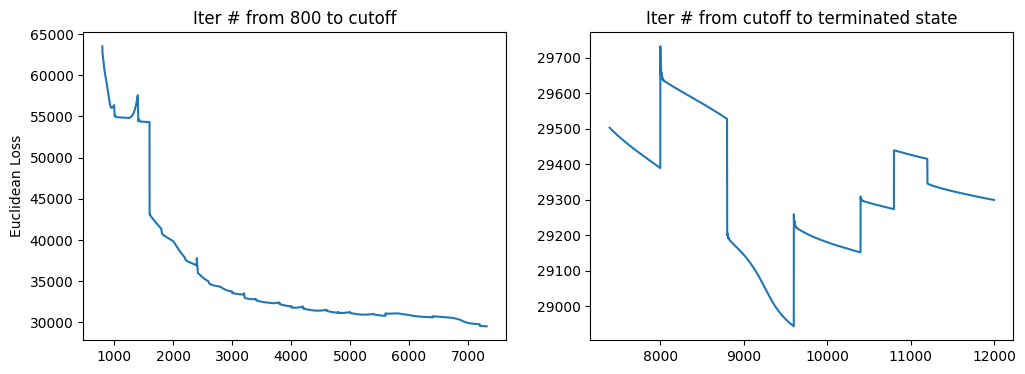

Loss (Total): 29299.569, (Spliced): 14739.849, (Unspliced): 14559.720: 100%|█████████▉| 11999/12000 [22:28<00:00,  8.90it/s]

Total loss 28943.733, vgene loss 29299.569


  0%|          | 0/3186 [00:00<?, ?cells/s]

In [3]:
sc.tl.leiden(adata)
adata.var['highly_variable'] = True # use all genes
velo_config = utv.config.Configuration()

print("Run uniTvelo\n")
adata = utv.run_model(adata,label="leiden",config_file=velo_config)

In [4]:
print(adata)
adata.write_h5ad("adata/UniTvelo.h5ad")

AnnData object with n_obs × n_vars = 3186 × 973
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'sample', 'S.Score', 'G2M.Score', 'Phase', 'integrated_snn_res.0.5', 'seurat_clusters', 'palantir_clusters', 'mono1', 'neu2', 'dc3', 'baso4', 'ery5', 'eos6', 'mep7', 'gmp8', 'cell_type', 'integrated_snn_res.0.4', 'integrated_snn_res.2', 'cell_type2', 'DF_score', 'DF_class', 'orig.lib', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'leiden', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2